In [1]:
@Mustafa Aktas

#Some required libraries

#To upload the data;
import scipy.io as sio
import pandas as pd

#To show the images
import matplotlib.pyplot as plt

#To calculate some matrices
import numpy as np

In [2]:
#Upload the dataset for 8
data_train_8 = sio.loadmat('data_train_8')
data_train_8 = data_train_8['data_train_8']
data_train_8 = np.asarray(pd.DataFrame(data_train_8).values)

#Upload the dataset for 1
data_train_1 = sio.loadmat('data_train_1')
data_train_1 = data_train_1['data_train_1']
data_train_1 = np.asarray(pd.DataFrame(data_train_1).values)

In [3]:
#Exhibit all the pictures for 8
"""
fig = plt.figure(1, figsize = [10, 10], dpi = 300)
c = 1
for i in range(200):
    plt.subplot(15,14,c)
    c = c+1
    plt.imshow(data_train_8[i:i+1:, ::].reshape(16,16))
plt.show()
"""

'\nfig = plt.figure(1, figsize = [10, 10], dpi = 300)\nc = 1\nfor i in range(200):\n    plt.subplot(15,14,c)\n    c = c+1\n    plt.imshow(data_train_8[i:i+1:, ::].reshape(16,16))\nplt.show()\n'

In [4]:
#Exhibit all the pictures for 1
"""
fig = plt.figure(1, figsize = [10, 10], dpi = 300)
c = 1
for i in range(200):
    plt.subplot(15,14,c)
    c = c+1
    plt.imshow(data_train_1[i:i+1:, ::].reshape(16,16))
plt.show()
"""

'\nfig = plt.figure(1, figsize = [10, 10], dpi = 300)\nc = 1\nfor i in range(200):\n    plt.subplot(15,14,c)\n    c = c+1\n    plt.imshow(data_train_1[i:i+1:, ::].reshape(16,16))\nplt.show()\n'

In [5]:
#Factorize the matrices by using SVD
u1, s1, v1 = np.linalg.svd(data_train_1)
u8, s8, v8 = np.linalg.svd(data_train_8)

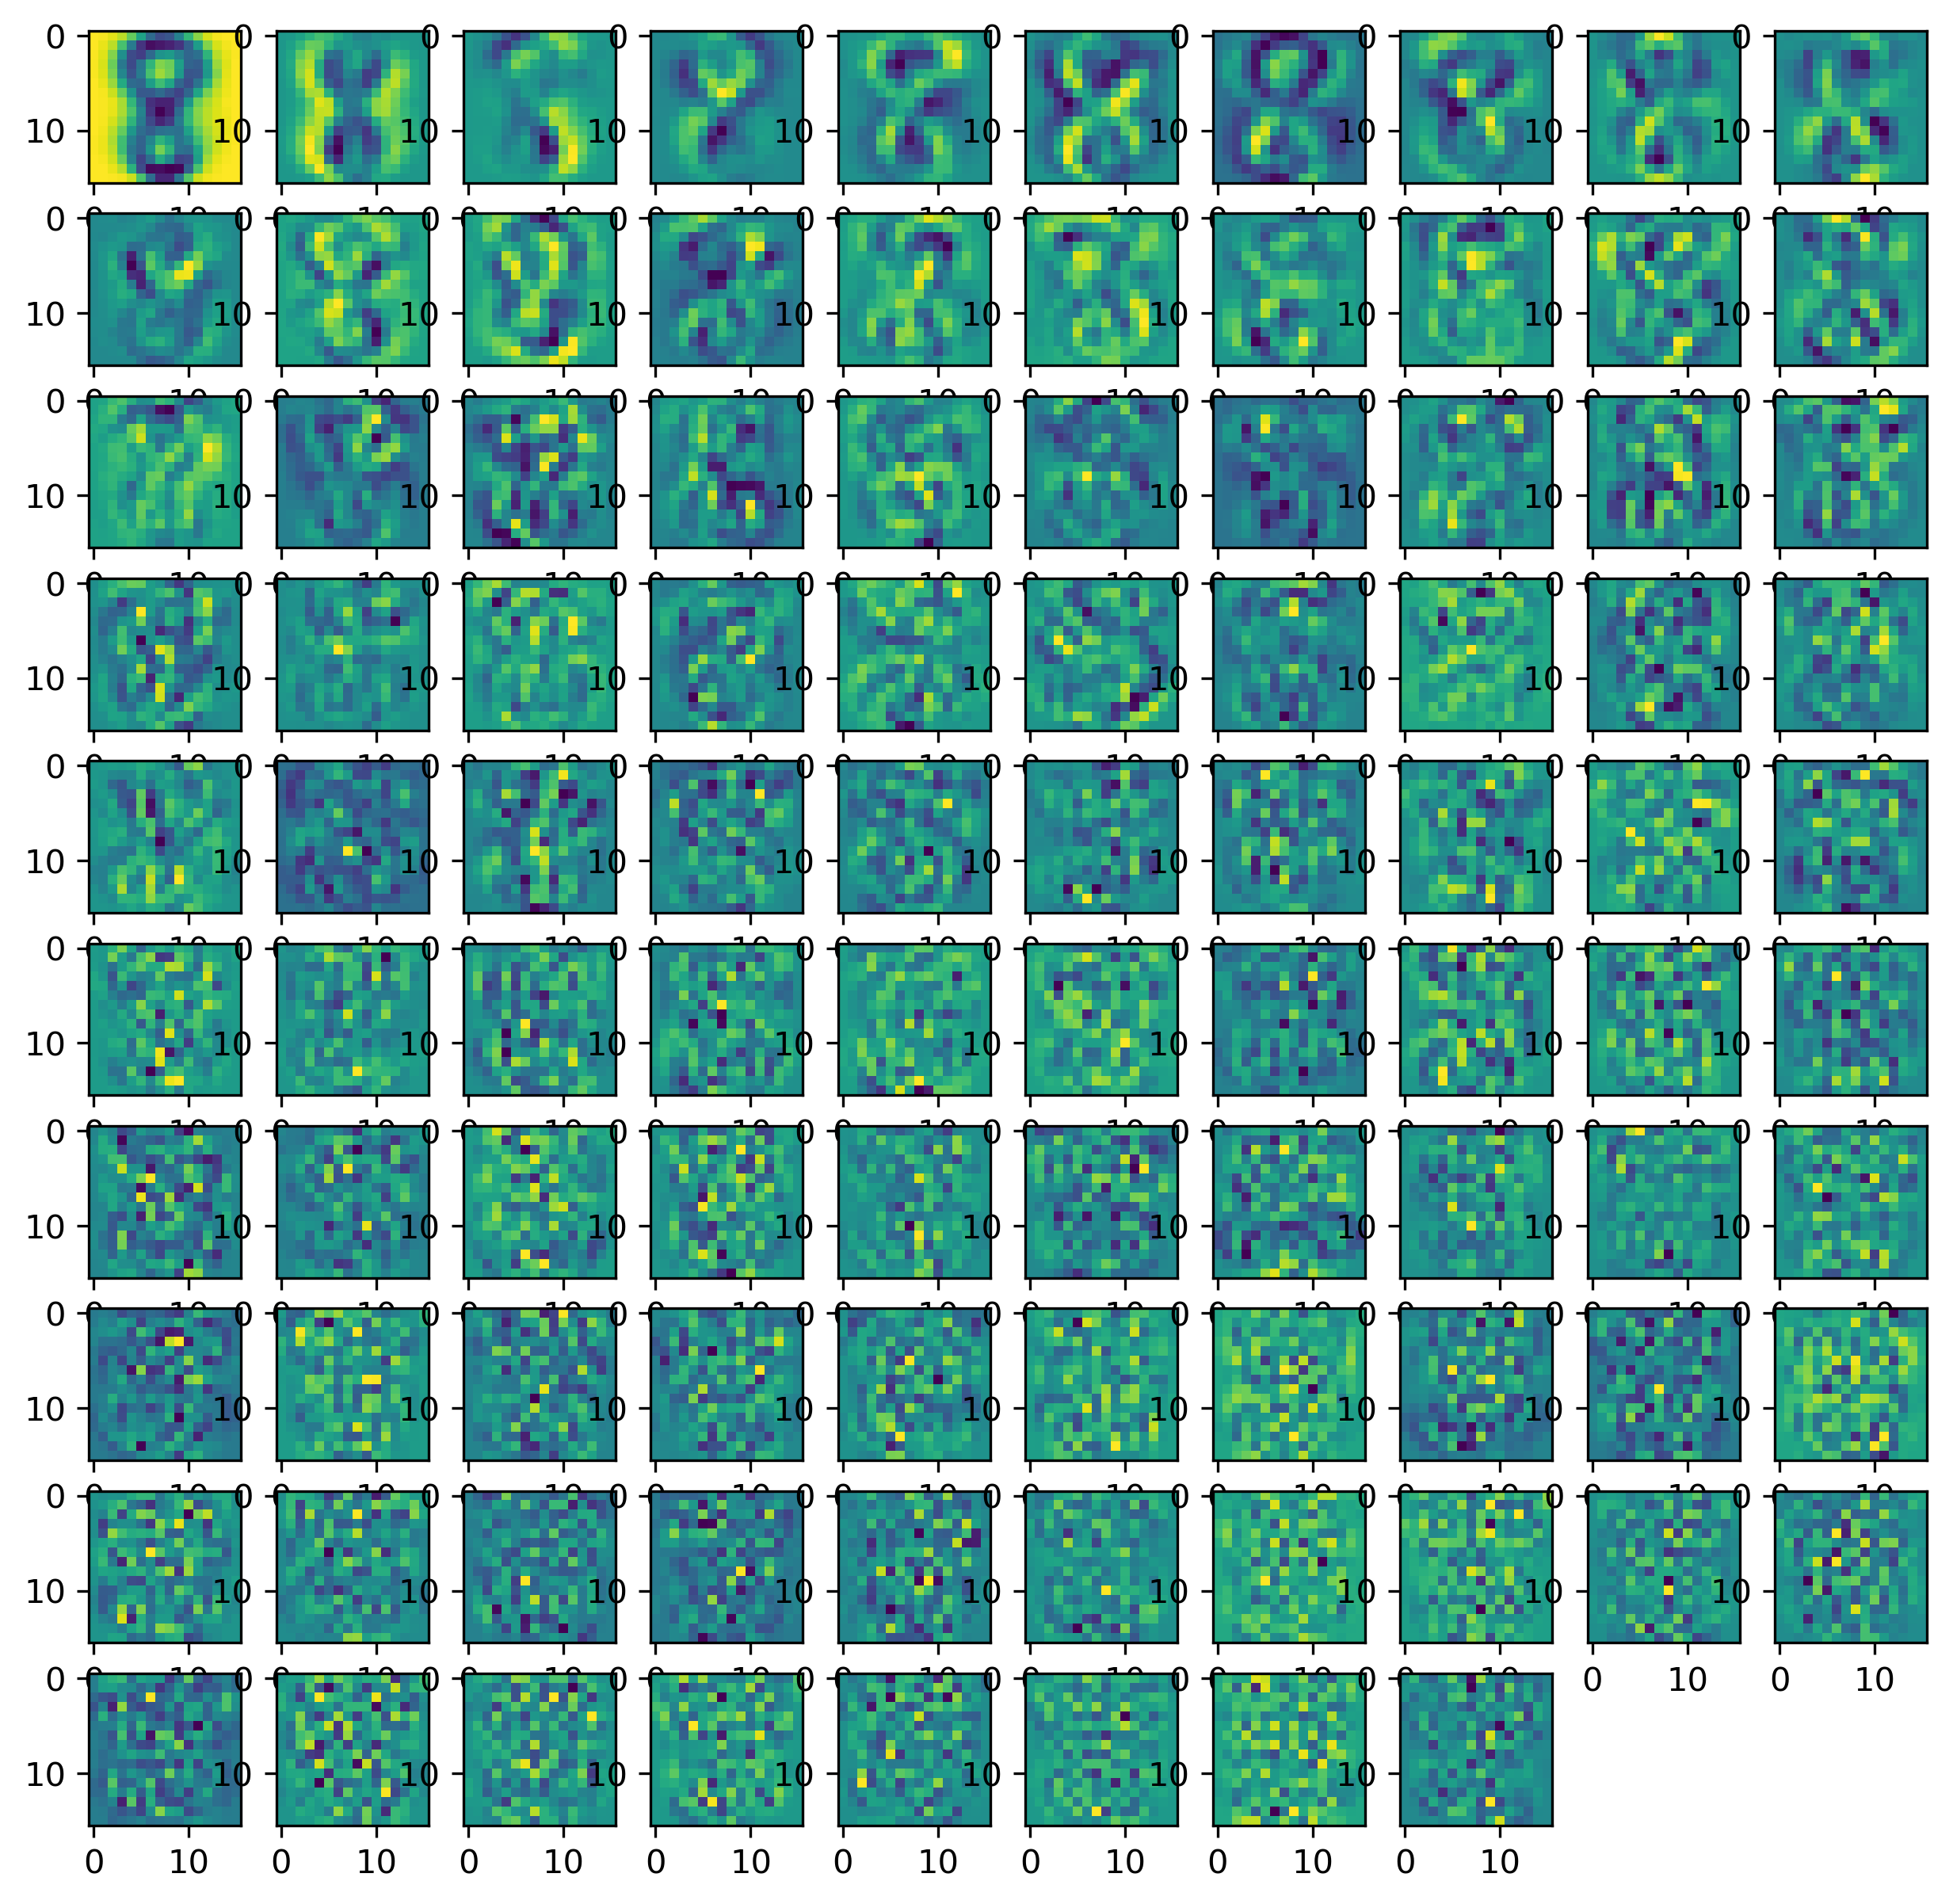

In [6]:
#Check the basis for 8
fig = plt.figure(1, figsize = [10, 10], dpi = 300)
c = 1
for i in range(98):
    plt.subplot(10,10,c)
    plt.imshow(v8[i:i+1,:].reshape(16,16))
    c = c+1
plt.show()

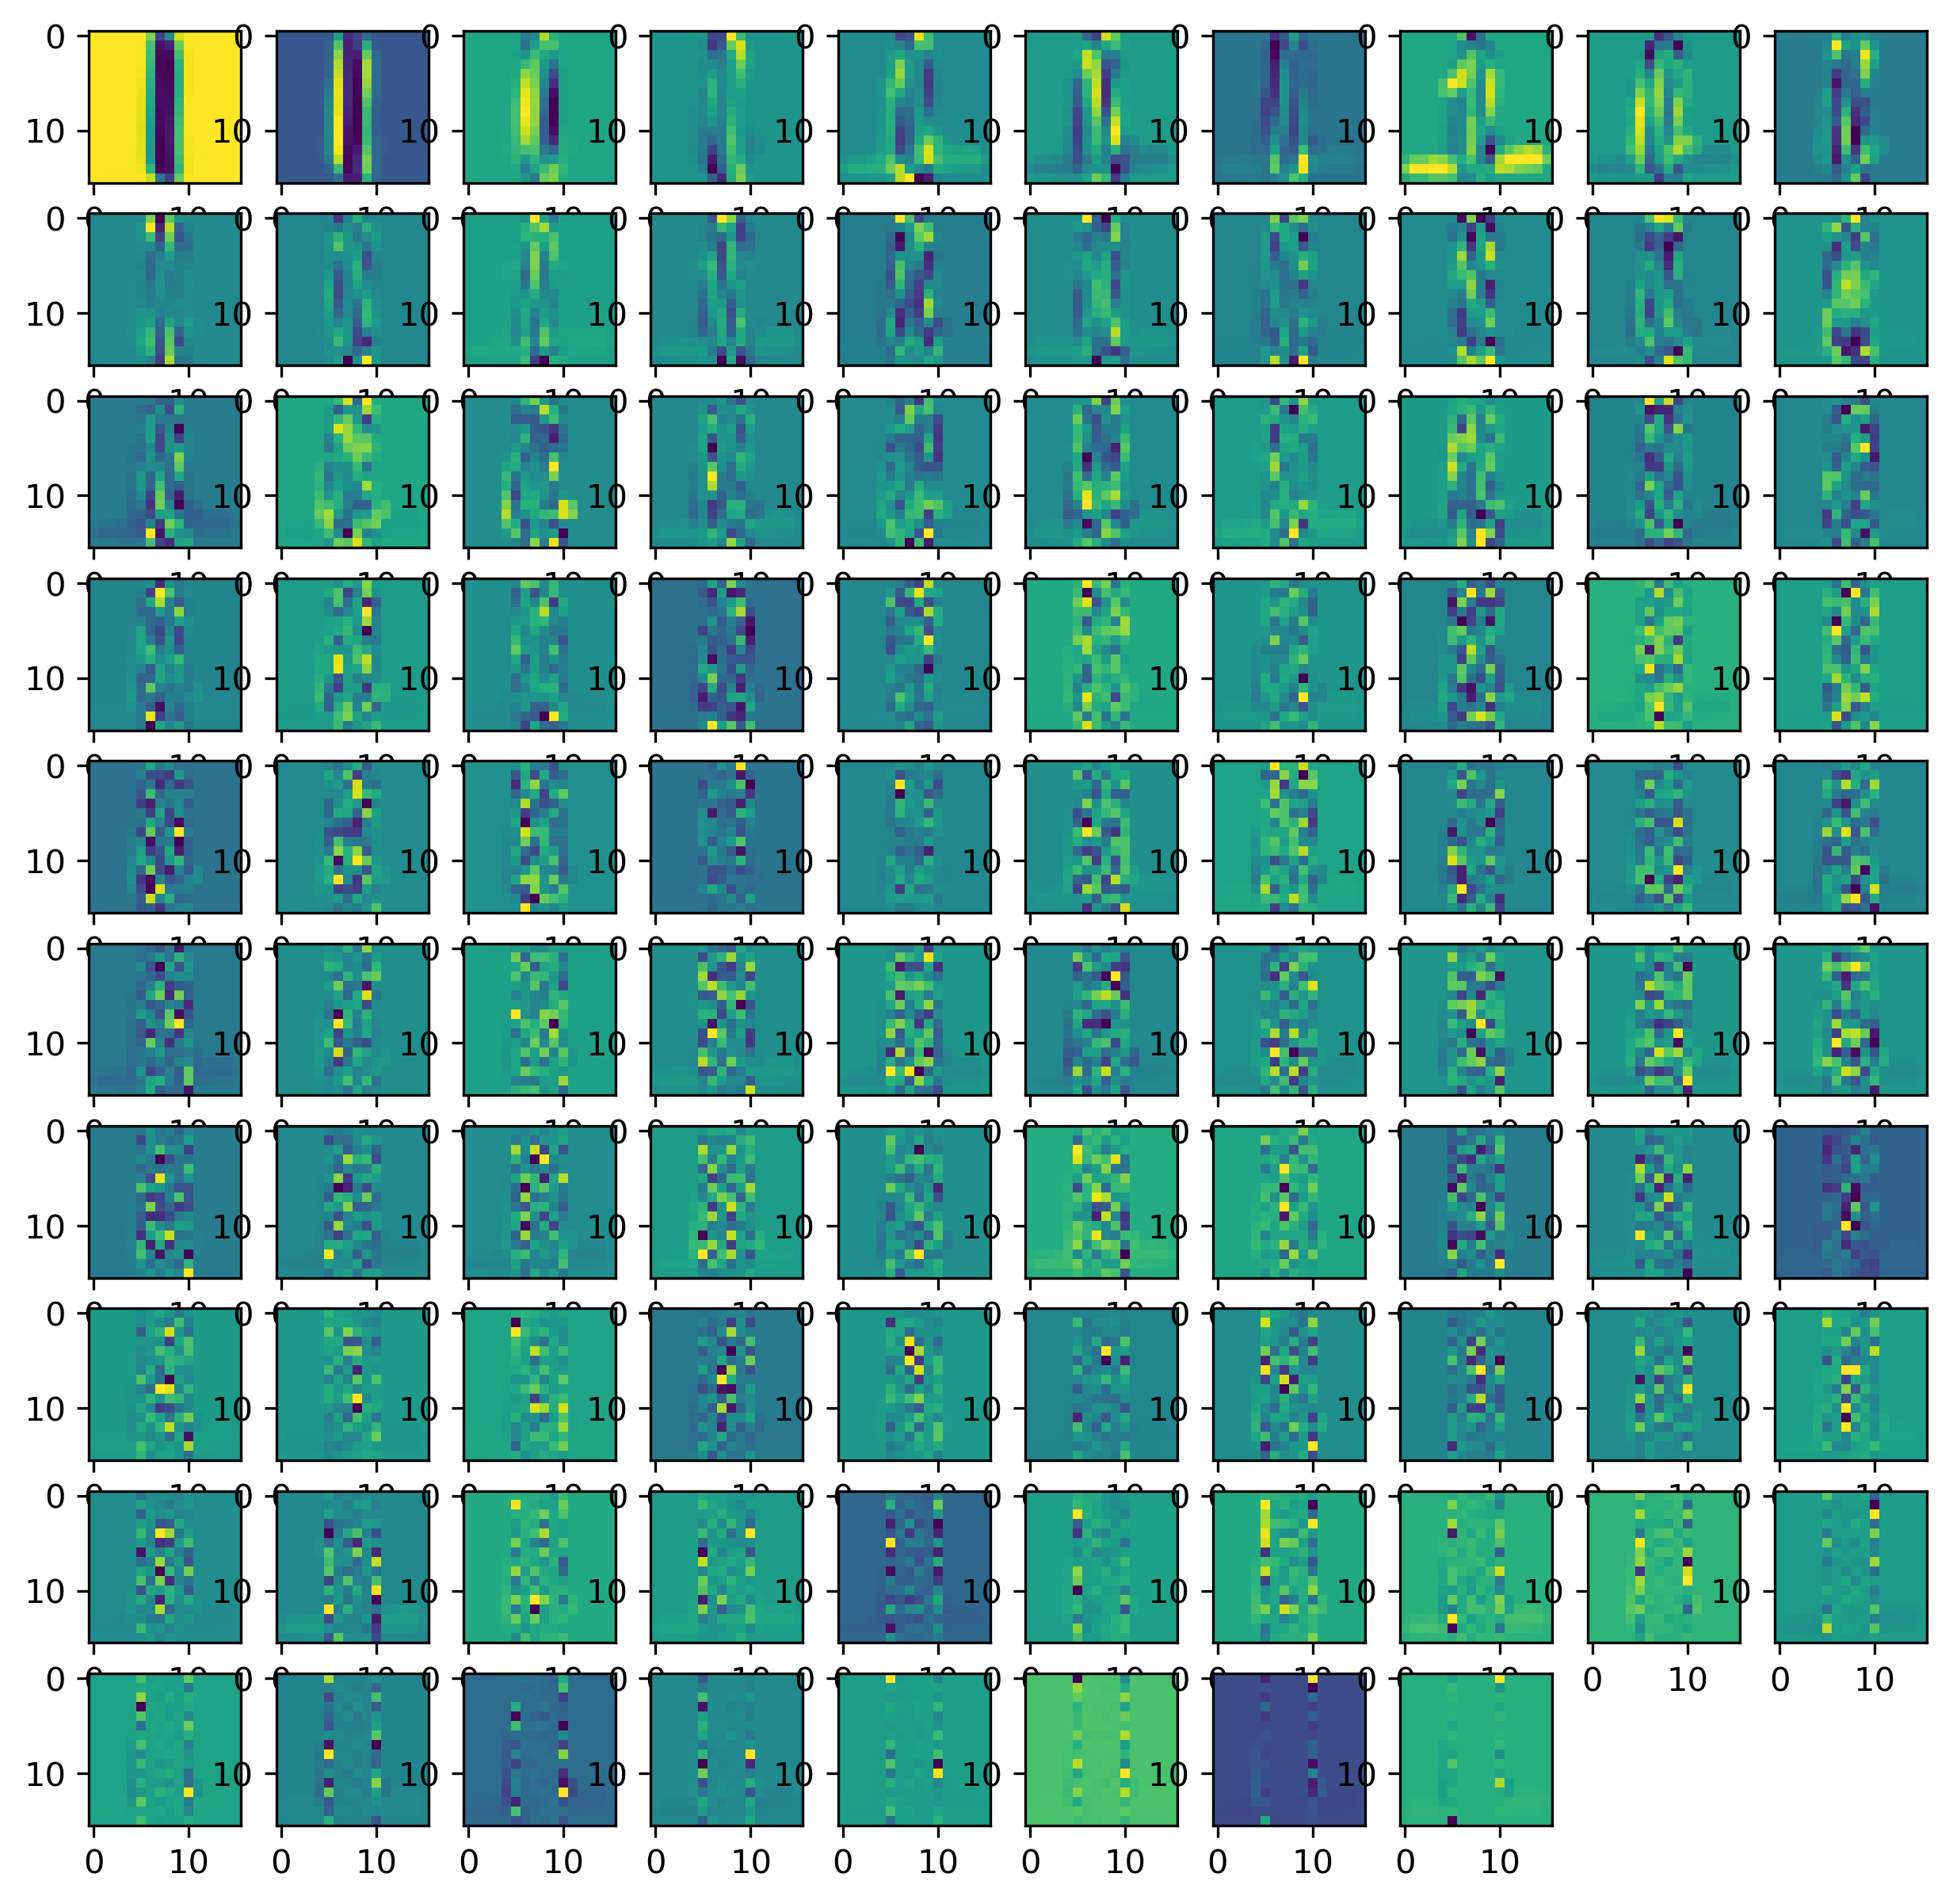

In [7]:
#Check the basis for 1
fig = plt.figure(1, figsize = [10, 10], dpi = 300)
c = 1
for i in range(98):
    plt.subplot(10,10,c)
    plt.imshow(v1[i:i+1,:].reshape(16,16))
    c = c+1
plt.show()

In [8]:
#Lets take the firts three most informative basis for 8 and 1
three_best_1 = v1[:3,:]
three_best_8 = v8[:3,:]

In [9]:
#Some arrays were created to store some values.

#It keeps the error value when the first three basis usage together
error_1 = np.zeros((1147,1)) 
error_8 = np.zeros((1147,1))

#It keeps the error value when the first two basis usage together
error_1_2 = np.zeros((1147,1)) 
error_8_2 = np.zeros((1147,1))

#It keeps the error value when only the first base usage
error_1_1 = np.zeros((1147,1))
error_8_1 = np.zeros((1147,1))

reconstruction_errors_3 = np.zeros((1147,1))#This for 3 usage together
reconstruction_errors_2 = np.zeros((1147,1))#This for 2 usage together
reconstruction_errors_1 = np.zeros((1147,1))#This for 1 usage together
labels_val = np.zeros((1147,1))

In [10]:
#Upload test dataset and its labels
data_test = sio.loadmat('data_test')
data_test = data_test['data_test']
data_test = np.asarray(pd.DataFrame(data_test).values)

data_labels = sio.loadmat('data_labels')
data_labels = data_labels['data_labels']
data_labels = np.asarray(pd.DataFrame(data_labels).values)

In [11]:
#The class for calculating the minimum error.
from scipy import optimize  #Import the optimize to use 'fmin' function

class findMinError(): #The class that calculates the minimum error for data set
    
    def __init__(self, basis, sample): #The constructor method takes the basis/
        self.basis = basis             #for data set and the sample that is/
        self.sample = sample           # going to be predicted.
        self.parameters = [[] for i in range(len(self.basis))]  #Empty array to store the constant to
                                                                #calculate the predicted matrix.
    def errfn(self, p): #This method calculates the error between the sample and the 
        for i in range(len(p)):
            self.parameters[i] = p[i]      
        return sum(((self.objective() - self.sample)**2).flatten())

    def objective(self): #It reconstruct the image
        recons_image = np.zeros((1,256))
        for i in range(len(self.basis)):
            recons_image += self.parameters[i]*self.basis[i]
        return recons_image

    def minErrorRepresentation(self): #This is for calculating the minimum error
        x0 = [[] for i in range(len(self.basis))]    
        for i in range(len(self.basis)):
            x0[i] = 0
        min_error = optimize.fmin(self.errfn, x0, disp=False)
        return min_error

In [12]:
#For predicting and calculating the accuracy when 3 bases used.

for i in range(len(data_test)):
    
    f8 = findMinError(three_best_8, data_test[i:i+1,:])
    hata8 = f8.errfn(f8.minErrorRepresentation())
    
    f1 = findMinError(three_best_1, data_test[i:i+1,:])
    hata1 = f1.errfn(f1.minErrorRepresentation())
    
    error_1[i] = hata1
    error_8[i] = hata8

for i in range(len(data_test)):
    if(error_1[i] < error_8[i]):
        labels_val[i] = 1
    else:
        labels_val[i] = 8
    
for i in range(len(data_labels)):
    if data_labels[i] == 1:
        reconstruction_errors_3[i] = error_1[i]
    else:
        reconstruction_errors_3[i] = error_8[i]
        
true3 = 0
false3 = 0

for i in range(len(data_labels)):
    if(data_labels[i] == labels_val[i]):
        true3 = true3 + 1
    else:
        false3 = false3 + 1

accuracy3 = true3/len(data_test)

print("True: "+str(true3), " False: "+str(false3))
print("Accuracy: "+ str(accuracy3))

True: 1137  False: 10
Accuracy: 0.99128160418483


In [13]:
#For predicting and calculating the accuracy when 2 bases used.

three_best_8 = v8[:2,:]
three_best_1 = v1[:2,:]

for i in range(len(data_test)):
    
    f8_2 = findMinError(three_best_8, data_test[i:i+1,:])
    hata8_2 = f8_2.errfn(f8_2.minErrorRepresentation())
    
    f1_2 = findMinError(three_best_1, data_test[i:i+1,:])
    hata1_2 = f1_2.errfn(f1_2.minErrorRepresentation())
    
    error_1_2[i] = hata1_2
    error_8_2[i] = hata8_2

for i in range(len(data_test)):
    if(error_1_2[i] < error_8_2[i]):
        labels_val[i] = 1
    else:
        labels_val[i] = 8
    
for i in range(len(data_labels)):
    if data_labels[i] == 1:
        reconstruction_errors_2[i] = error_1_2[i]
    else:
        reconstruction_errors_2[i] = error_8_2[i]
        
true2 = 0
false2 = 0

for i in range(len(data_labels)):
    if(data_labels[i] == labels_val[i]):
        true2 = true2 + 1
    else:
        false2 = false2 + 1

accuracy2 = true2/len(data_test)

print("True: "+str(true2), " False: "+str(false2))
print("Accuracy: "+ str(accuracy2))

True: 1139  False: 8
Accuracy: 0.993025283347864


In [14]:
#For predicting and calculating the accuracy when 1 base used.

three_best_8 = v8[:1,:]
three_best_1 = v1[:1,:]

for i in range(len(data_test)):
    
    f8_1 = findMinError(three_best_1, data_test[i:i+1,:])
    hata8_1 = f8_1.errfn(f8_1.minErrorRepresentation())
    
    f1_1 = findMinError(three_best_1, data_test[i:i+1,:])
    hata1_1 = f1_2.errfn(f1_1.minErrorRepresentation())
    
    error_1_1[i] = hata1_1
    error_8_1[i] = hata8_1

for i in range(len(data_test)):
    if(error_1_1[i] < error_8_1[i]):
        labels_val[i] = 1
    else:
        labels_val[i] = 8
    
for i in range(len(data_labels)):
    if data_labels[i] == 1:
        reconstruction_errors_1[i] = error_1_1[i]
    else:
        reconstruction_errors_1[i] = error_8_1[i]
        
true1 = 0
false1 = 0

for i in range(len(data_labels)):
    if(data_labels[i] == labels_val[i]):
        true1 = true1 + 1
    else:
        false1 = false1 + 1

accuracy1 = true1/len(data_test)

print("True: "+str(true1), " False: "+str(false1))
print("Accuracy: "+ str(accuracy1))

True: 69  False: 1078
Accuracy: 0.06015693112467306


In [15]:
#It is for easy to compare the results
Results = {'Accuracy': [round((accuracy1), 2), round((accuracy2), 2), round((accuracy3), 2)],
           'False' : [false1, false2, false3],
           'True' : [true1, true2, true3],
            ' ' : ["Base 1", "Base 2", "Base 3"]}

data_pandas = pd.DataFrame(Results)
display(data_pandas)

,,Accuracy,False,True
0,Base 1,0.06,1078,69
1,Base 2,0.99,8,1139
2,Base 3,0.99,10,1137
